# sklearn 中的多项式回归和 Pipeline

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly = PolynomialFeatures(degree=2) #degree, 最大到 X 的多少次幂
poly.fit(X)
X2 = poly.transform(X)

In [29]:
X2.shape

(100, 3)

In [30]:
X2[:5, :] # [X^0, X^1, X^2]

array([[ 1.        ,  0.77166987,  0.59547438],
       [ 1.        ,  0.63367176,  0.4015399 ],
       [ 1.        , -1.68328789,  2.83345813],
       [ 1.        , -0.50251917,  0.25252551],
       [ 1.        , -0.4288981 ,  0.18395358]])

In [31]:
X[:5, :]

array([[ 0.77166987],
       [ 0.63367176],
       [-1.68328789],
       [-0.50251917],
       [-0.4288981 ]])

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

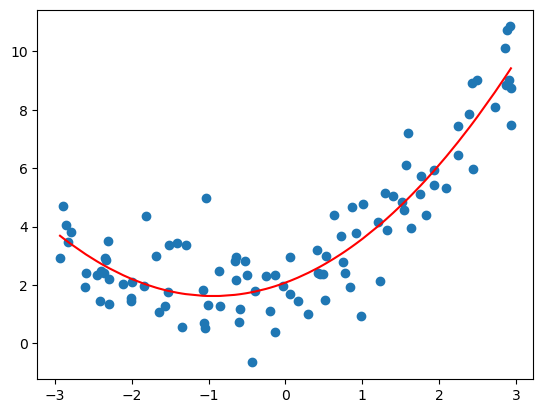

In [34]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [35]:
lin_reg2.coef_

array([0.        , 0.9779022 , 0.52012365])

In [36]:
lin_reg2.intercept_

2.0793310298946857

# 关于 PolynomialFeatures

In [37]:
X = np.arange(1, 11).reshape(-1, 2)
X.shape

(5, 2)

In [38]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [39]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [40]:
X2.shape

(5, 6)

In [41]:
X2 # [X^0, X1^1, X2^1, X1^2, X1X2, X2^2]

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [42]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)

In [43]:
X3.shape

(5, 10)

In [44]:
X3 # [1, x1, x2, x1^2, x2^2, x1x2, x1^3, x2^3, x1^2x2, x1x2^2]

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

# Pipeline

In [45]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [47]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

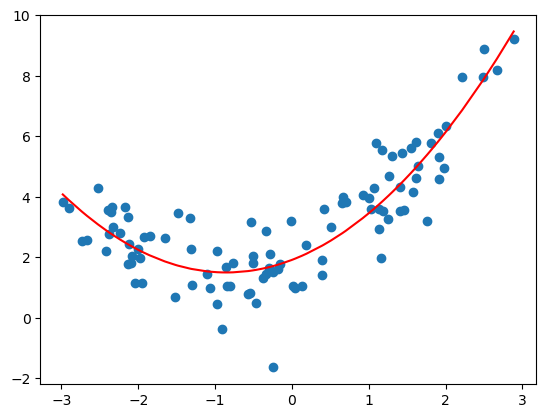

In [48]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()